In [1]:
import numpy as np
import matplotlib.pyplot as plt

# You may change the mhealth_activity module but your algorithm must support the original version
from mhealth_activity import Recording, Trace, Activity, WatchLocation, Path

# For interactive plots, uncomment the following line
# %matplotlib widget

In [2]:
import os
import pandas as pd

files = os.listdir('data/train')
list_of_dfs = []

for file in files:
    d = Recording(os.path.join('data/train',file))
    list_of_dfs.append(d)

data = pd.DataFrame(list_of_dfs)

### Make dataframes with every kind of variable and then export those

In [ ]:
def make_dataframe(key_names):
    data_list = []
    for row in data["recording"]:
        data_list.extend([row.data[key] for key in key_names])
    return data_list

In [3]:
data.columns = ["recording"]

In [4]:
## Dataframe for acceleration data
acceleration = []
for row in data["recording"]:
    acceleration.extend([[row.data["ax"],row.data["ay"],row.data["az"]]])

acceleration = np.array(acceleration)

In [5]:
data["recording"][0]

Recording(filename='train_trace_000.pkl', labels={'path_idx': 2, 'activities': [1], 'step_count': None, 'watch_loc': 1}, data={'altitude': Trace(title='altitude', total_time=584.87, samplerate=12.52, max_update_gap=9.99), 'ax': Trace(title='ax', total_time=584.87, samplerate=200.30, max_update_gap=0.02), 'ay': Trace(title='ay', total_time=584.87, samplerate=200.30, max_update_gap=0.02), 'az': Trace(title='az', total_time=584.87, samplerate=200.30, max_update_gap=0.04), 'bearing': Trace(title='bearing', total_time=584.87, samplerate=12.52, max_update_gap=9.99), 'gx': Trace(title='gx', total_time=584.87, samplerate=200.30, max_update_gap=0.02), 'gy': Trace(title='gy', total_time=584.87, samplerate=200.30, max_update_gap=0.02), 'gz': Trace(title='gz', total_time=584.87, samplerate=200.30, max_update_gap=0.02), 'latitude': Trace(title='latitude', total_time=584.87, samplerate=12.52, max_update_gap=9.99), 'longitude': Trace(title='longitude', total_time=584.87, samplerate=12.52, max_update_

In [6]:
len(acceleration)

396

In [7]:
acceleration.shape

(396, 3)

In [8]:
## Dataframe for gx, gy, gz
gyroscope = []
for row in data["recording"]:
    gyroscope.extend([[row.data["gx"],row.data["gy"],row.data["gz"]]])

gyroscope = np.array(gyroscope)

In [9]:
## Dataframe for magnetometer
magnetometer = []
for row in data["recording"]:
    magnetometer.extend([[row.data["mx"],row.data["my"],row.data["mz"]]])

magnetometer = np.array(magnetometer)

In [10]:
## Dataframe for temperature
temperature = []
for row in data["recording"]:
    temperature.append([row.data["temperature"]])

temperature = np.array(temperature)

In [11]:
## Dataframe for phone magnetometer
phone_magnetometer = []
for row in data["recording"]:
    phone_magnetometer.extend([[row.data["phone_mx"],row.data["phone_my"],row.data["phone_mz"]]])

phone_magnetometer = np.array(phone_magnetometer)

In [12]:
## Things that shall not be used for input - Excluding phone steps
not_input = []
for row in data["recording"]:
    not_input.extend([[row.data["latitude"],row.data["altitude"],row.data["bearing"],row.data["speed"],row.data["longitude"]]])

not_input = np.array(not_input)

In [13]:
## Dataframe for phone gyroscope
phone_gyroscope = []
for row in data["recording"]:
    phone_gyroscope.extend([[row.data["phone_gx"],row.data["phone_gy"],row.data["phone_gz"]]])

phone_gyroscope = np.array(phone_gyroscope)

In [14]:
## GRAVY
phone_gravy = []
for row in data["recording"]:
    phone_gravy.extend([[row.data["phone_gravx"],row.data["phone_gravy"],row.data["phone_gravz"]]])

phone_gravy = np.array(phone_gravy)

In [15]:
## Dataframe for temperature
phone_rotm = []
for row in data["recording"]:
    phone_rotm.append([row.data["phone_rotm"]])

phone_rotm = np.array(phone_rotm)

In [16]:
## phone la, ...
phone_la = []
for row in data["recording"]:
    phone_la.extend([[row.data["phone_lax"],row.data["phone_lay"],row.data["phone_laz"]]])

phone_la = np.array(phone_la)

In [17]:
## phone rotation
phone_rotation = []
for row in data["recording"]:
    phone_rotation.extend([[row.data["phone_rotx"],row.data["phone_roty"],row.data["phone_rotz"]]])

phone_rotation = np.array(phone_rotation)

In [59]:
data["recording"][1].data["packetNumber"]

Trace(title='packetNumber', total_time=519.01, samplerate=12.52, max_update_gap=0.27)

Some labels are incomplete: These are note, phone_steps, lost_packets, phone_orientationx, y, z

Unsure what to do with timestamp labels, packet_number

In [18]:
to_export = np.concatenate((acceleration,gyroscope,magnetometer,temperature,phone_magnetometer,not_input,
                            phone_gyroscope,phone_gravy,phone_rotm,phone_la,phone_rotation),axis=1)

In [22]:
to_export[1]

array([Trace(title='ax', total_time=519.01, samplerate=200.26, max_update_gap=0.03),
       Trace(title='ay', total_time=519.01, samplerate=200.26, max_update_gap=0.02),
       Trace(title='az', total_time=519.01, samplerate=200.26, max_update_gap=0.17),
       Trace(title='gx', total_time=519.01, samplerate=200.26, max_update_gap=0.03),
       Trace(title='gy', total_time=519.01, samplerate=200.26, max_update_gap=0.02),
       Trace(title='gz', total_time=519.01, samplerate=200.26, max_update_gap=0.10),
       Trace(title='mx', total_time=519.01, samplerate=12.52, max_update_gap=0.93),
       Trace(title='my', total_time=519.01, samplerate=12.52, max_update_gap=1.02),
       Trace(title='mz', total_time=519.01, samplerate=12.52, max_update_gap=1.23),
       Trace(title='temperature', total_time=519.01, samplerate=12.52, max_update_gap=270.36),
       Trace(title='phone_mx', total_time=519.01, samplerate=99.36, max_update_gap=0.12),
       Trace(title='phone_my', total_time=519.01, sam

#### Figure out how to make a nice signal dataframe

In [37]:
to_export[1][1]

Trace(title='ay', total_time=519.01, samplerate=200.26, max_update_gap=0.02)

In [19]:
new_list = []
for x, t in list(zip(to_export[1][0].timestamps, to_export[1][0].values)):
    new_list.append([x,t])

In [20]:
new_list

[[0.0, 0.427734375],
 [0.004993592148939241, 0.443603515625],
 [0.009987184297878482, 0.451171875],
 [0.014980776446817723, 0.44091796875],
 [0.019974368595756964, 0.430419921875],
 [0.024967960744696205, 0.4130859375],
 [0.029961552893635446, 0.39599609375],
 [0.03495514504257469, 0.390625],
 [0.03994873719151393, 0.38623046875],
 [0.04494232934045317, 0.379638671875],
 [0.04993592148939241, 0.3876953125],
 [0.05492951363833165, 0.405029296875],
 [0.05992310578727089, 0.420654296875],
 [0.06491669793621013, 0.43896484375],
 [0.06991029008514937, 0.454833984375],
 [0.07490388223408861, 0.45947265625],
 [0.07989747438302786, 0.46728515625],
 [0.0848910665319671, 0.467529296875],
 [0.08988465868090634, 0.470703125],
 [0.09487825082984558, 0.478759765625],
 [0.09987184297878482, 0.466064453125],
 [0.10486543512772406, 0.44970703125],
 [0.1098590272766633, 0.431884765625],
 [0.11485261942560254, 0.412353515625],
 [0.11984621157454178, 0.37646484375],
 [0.12483980372348102, 0.343017578125],

In [14]:
acceleration[:,0]

array([Trace(title='ax', total_time=584.87, samplerate=200.30, max_update_gap=0.02),
       Trace(title='ax', total_time=519.01, samplerate=200.26, max_update_gap=0.03),
       Trace(title='ax', total_time=594.12, samplerate=200.01, max_update_gap=0.15),
       Trace(title='ax', total_time=519.63, samplerate=200.05, max_update_gap=0.05),
       Trace(title='ax', total_time=625.44, samplerate=199.95, max_update_gap=0.02),
       Trace(title='ax', total_time=499.81, samplerate=199.88, max_update_gap=0.15),
       Trace(title='ax', total_time=473.97, samplerate=199.91, max_update_gap=0.06),
       Trace(title='ax', total_time=618.44, samplerate=199.86, max_update_gap=0.04),
       Trace(title='ax', total_time=599.79, samplerate=199.96, max_update_gap=0.10),
       Trace(title='ax', total_time=615.10, samplerate=197.28, max_update_gap=0.47),
       Trace(title='ax', total_time=648.10, samplerate=200.04, max_update_gap=0.41),
       Trace(title='ax', total_time=578.03, samplerate=199.82, ma

In [15]:
accelerator_list_x = []
for sample in acceleration[:,0]:
    inside_list = []
    for x, t in list(zip(sample.timestamps, sample.values)):
        inside_list.append([x,t])
    accelerator_list_x.append(inside_list)

KeyboardInterrupt: 

In [ ]:
accelerator_list_y = []
for sample in acceleration[:,1]:
    inside_list = []
    for x, t in list(zip(sample.timestamps, sample.values)):
        inside_list.append([x,t])
    accelerator_list_y.append(inside_list)

In [56]:
bigger_list = []
for feature in to_export[1]:
    inside_list = []
    for x, t in list(zip(feature.timestamps, feature.values)):
        inside_list.append([x,t])
    bigger_list.append(inside_list)

In [65]:
pd.DataFrame(bigger_list)

,0,1,2,3,4,5,6,7,8,9,...,103926,103927,103928,103929,103930,103931,103932,103933,103934,103935
0,"[0.0, 0.427734375]","[0.004993592148939241, 0.443603515625]","[0.009987184297878482, 0.451171875]","[0.014980776446817723, 0.44091796875]","[0.019974368595756964, 0.430419921875]","[0.024967960744696205, 0.4130859375]","[0.029961552893635446, 0.39599609375]","[0.03495514504257469, 0.390625]","[0.03994873719151393, 0.38623046875]","[0.04494232934045317, 0.379638671875]",...,"[518.9640576706596, 0.048583984375]","[518.9690512628085, 0.053955078125]","[518.9740448549575, 0.05126953125]","[518.9790384471064, 0.059326171875]","[518.9840320392553, 0.062255859375]","[518.9890256314043, 0.06005859375]","[518.9940192235532, 0.05908203125]","[518.9990128157021, 0.062255859375]","[519.0040064078511, 0.06640625]","[519.009, 0.0732421875]"
1,"[0.0, -0.381103515625]","[0.004993592148939241, -0.392333984375]","[0.009987184297878482, -0.3955078125]","[0.014980776446817723, -0.397705078125]","[0.019974368595756964, -0.405517578125]","[0.024967960744696205, -0.4208984375]","[0.029961552893635446, -0.445556640625]","[0.03495514504257469, -0.4580078125]","[0.03994873719151393, -0.472900390625]","[0.04494232934045317, -0.485107421875]",...,"[518.9640576706596, -0.793701171875]","[518.9690512628085, -0.803955078125]","[518.9740448549575, -0.81494140625]","[518.9790384471064, -0.832763671875]","[518.9840320392553, -0.847412109375]","[518.9890256314043, -0.855712890625]","[518.9940192235532, -0.872802734375]","[518.9990128157021, -0.885498046875]","[519.0040064078511, -0.8955078125]","[519.009, -0.900146484375]"
2,"[0.0, 0.83349609375]","[0.004993592148939241, 0.862548828125]","[0.009987184297878482, 0.88232421875]","[0.014980776446817723, 0.918212890625]","[0.019974368595756964, 0.93505859375]","[0.024967960744696205, 0.9560546875]","[0.029961552893635446, 0.96826171875]","[0.03495514504257469, 0.988037109375]","[0.03994873719151393, 0.997802734375]","[0.04494232934045317, 1.0224609375]",...,"[518.9640576706596, 0.40380859375]","[518.9690512628085, 0.42626953125]","[518.9740448549575, 0.453369140625]","[518.9790384471064, 0.470947265625]","[518.9840320392553, 0.494873046875]","[518.9890256314043, 0.507080078125]","[518.9940192235532, 0.530029296875]","[518.9990128157021, 0.5380859375]","[519.0040064078511, 0.55029296875]","[519.009, 0.54443359375]"
3,"[0.0, -3.23486328125]","[0.004993592148939241, -4.08935546875]","[0.009987184297878482, -3.753662109375]","[0.014980776446817723, -2.6092529296875]","[0.019974368595756964, -0.8544921875]","[0.024967960744696205, 1.373291015625]","[0.029961552893635446, 4.241943359375]","[0.03495514504257469, 6.8206787109375]","[0.03994873719151393, 9.6282958984375]","[0.04494232934045317, 12.359619140625]",...,"[518.9640576706596, -3.1280517578125]","[518.9690512628085, -3.021240234375]","[518.9740448549575, -3.6163330078125]","[518.9790384471064, -4.45556640625]","[518.9840320392553, -5.279541015625]","[518.9890256314043, -5.9356689453125]","[518.9940192235532, -6.683349609375]","[518.9990128157021, -6.9427490234375]","[519.0040064078511, -6.3629150390625]","[519.009, -5.0811767578125]"
4,"[0.0, -112.97607421875]","[0.004993592148939241, -112.396240234375]","[0.009987184297878482, -111.9384765625]","[0.014980776446817723, -112.213134765625]","[0.019974368595756964, -112.7777099609375]","[0.024967960744696205, -113.58642578125]","[0.029961552893635446, -114.3646240234375]","[0.03495514504257469, -114.5172119140625]","[0.03994873719151393, -114.715576171875]","[0.04494232934045317, -114.4561767578125]",...,"[518.9640576706596, -29.876708984375]","[518.9690512628085, -30.1666259765625]","[518.9740448549575, -30.9600830078125]","[518.9790384471064, -32.1197509765625]","[518.9840320392553, -34.0118408203125]","[518.9890256314043, -36.19384765625]","[518.9940192235532, -38.6810302734375]","[518.9990128157021, -40.95458984375]","[519.0040064078511, -42.1905517578125]","[519.009, -42.54150390625]"
5,"[0.0, 23.8037109375]","[0.00

In [23]:
def export_signals_as_csv(input_sample, sample_nr):
    bigger_list = []
    for feature in input_sample:
        inside_list = []
        for x, t in list(zip(feature.timestamps, feature.values)):
            inside_list.append([x,t])
        bigger_list.append(inside_list)
    bigger_list = pd.DataFrame(bigger_list)
    bigger_list.to_csv(f'extracted_signal_{sample_nr}.csv')

In [26]:
index = 0
for sample in to_export:
    export_signals_as_csv(sample, index)
    index = index + 1

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x000001232BA33550>>
Traceback (most recent call last):
  File "c:\Users\oliwi\Documents\MHA\mhavenv\Lib\site-packages\ipykernel\ipkernel.py", line 770, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


KeyboardInterrupt: 

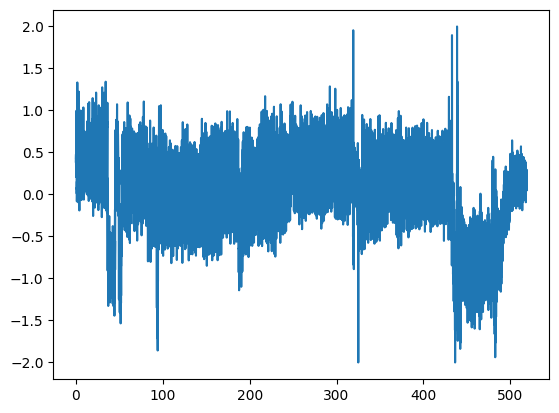

In [27]:
from scipy.fft import fft, fftfreq

new_list = pd.DataFrame(new_list)
plt.plot(new_list[0],new_list[1])

In [5]:
import scipy.stats as stats

FEATURES = ['MIN','MAX','MEAN','RMS','VAR','STD','POWER','PEAK','P2P','CREST FACTOR','SKEW','KURTOSIS',
            'MAX_f','SUM_f','MEAN_f','VAR_f','PEAK_f','SKEW_f','KURTOSIS_f']

In [6]:
def features_extraction(df): 
    
    
    Min=[];Max=[];Mean=[];Rms=[];Var=[];Std=[];Power=[];Peak=[];Skew=[];Kurtosis=[];P2p=[];CrestFactor=[];
    FormFactor=[]; PulseIndicator=[];
    Max_f=[];Sum_f=[];Mean_f=[];Var_f=[];Peak_f=[];Skew_f=[];Kurtosis_f=[]
    
    X = df.values
    ## TIME DOMAIN ##

    Min.append(np.min(X))
    Max.append(np.max(X))
    Mean.append(np.mean(X))
    Rms.append(np.sqrt(np.mean(X**2)))
    Var.append(np.var(X))
    Std.append(np.std(X))
    Power.append(np.mean(X**2))
    Peak.append(np.max(np.abs(X)))
    P2p.append(np.ptp(X))
    CrestFactor.append(np.max(np.abs(X))/np.sqrt(np.mean(X**2)))
    Skew.append(stats.skew(X))
    Kurtosis.append(stats.kurtosis(X))
    FormFactor.append(np.sqrt(np.mean(X**2))/np.mean(X))
    PulseIndicator.append(np.max(np.abs(X))/np.mean(X))
    ## FREQ DOMAIN ##
    ft = fft(X)
    S = np.abs(ft**2)/len(df)
    Max_f.append(np.max(S))
    Sum_f.append(np.sum(S))
    Mean_f.append(np.mean(S))
    Var_f.append(np.var(S))
    
    Peak_f.append(np.max(np.abs(S)))
    Skew_f.append(stats.skew(X))
    Kurtosis_f.append(stats.kurtosis(X))
    #Create dataframe from features
    df_features = pd.DataFrame(index = [FEATURES], 
                               data = [Min,Max,Mean,Rms,Var,Std,Power,Peak,P2p,CrestFactor,Skew,Kurtosis,
                                       Max_f,Sum_f,Mean_f,Var_f,Peak_f,Skew_f,Kurtosis_f])
    return df_features

This requires a dataframe with accelerometer data and the time points

In [51]:
inside_list = []
for x, t in list(zip(acceleration[0,0].timestamps, acceleration[0,0].values)):
    inside_list.append([x,t])
inside_list = pd.DataFrame(inside_list)
features_signal = features_extraction(inside_list)

In [53]:
trial = pd.DataFrame.transpose(features_signal)

In [54]:
trial

,MIN,MAX,MEAN,RMS,VAR,STD,POWER,PEAK,P2P,CREST FACTOR,SKEW,KURTOSIS,MAX_f,SUM_f,MEAN_f,VAR_f,PEAK_f,SKEW_f,KURTOSIS_f
0,-1.594727,584.874,146.426752,238.774597,35572.51437,188.606772,57013.308149,584.874,586.468727,2.449482,"[1.3530510022178173e-16, 0.47251016099754467]","[-1.2000000001748685, 1.3459480019694308]",2.929845,228053.232597,0.973322,0.757903,2.929845,"[1.3530510022178173e-16, 0.47251016099754467]","[-1.2000000001748685, 1.3459480019694308]"


In [55]:
from scipy.fft import fft, fftfreq

accelerator_list_x = []
for sample in acceleration[1:,0]:
    new = []
    for x, t in list(zip(sample.timestamps, sample.values)):
        new.append([x,t])
    new = pd.DataFrame(new)
    features_inside = features_extraction(new)
    trial = pd.concat([trial,pd.DataFrame.transpose(features_inside)])

In [56]:
trial

,MIN,MAX,MEAN,RMS,VAR,STD,POWER,PEAK,P2P,CREST FACTOR,SKEW,KURTOSIS,MAX_f,SUM_f,MEAN_f,VAR_f,PEAK_f,SKEW_f,KURTOSIS_f
0,-1.594727,584.874,146.426752,238.774597,35572.51437,188.606772,57013.308149,584.874,586.468727,2.449482,"[1.3530510022178173e-16, 0.47251016099754467]","[-1.2000000001748685, 1.3459480019694308]",2.929845,228053.232597,0.973322,0.757903,2.929845,"[1.3530510022178173e-16, 0.47251016099754467]","[-1.2000000001748685, 1.3459480019694308]"
0,-2.0,519.009,129.792714,211.885307,28049.23471,167.479058,44895.383338,519.009,521.009,2.449481,"[-8.730090243912896e-17, -0.7959136986381422]","[-1.2000000002221676, 0.5258192580840979]",2.592523,179581.533351,0.863904,0.597078,2.592523,"[-8.730090243912896e-17, -0.7959136986381422]","[-1.2000000002221676, 0.5258192580840979]"
0,-2.0,594.119,148.28887,242.549098,36840.476287,191.938731,58830.065116,594.119,596.119,2.449479,"[-4.0723699701824376e-16, -0.03350746069858755]","[-1.2000000001699596, 4.002637465205588]",2.980016,235320.260464,0.990138,0.784309,2.980016,"[-4.0723699701824376e-16, -0.03350746069858755]","[-1.2000000001699596, 4.002637465205588]"
0,-0.330566,519.631,130.390093,212.140212,28001.893174,167.337662,45003.469581,519.631,519.961566,2.44947,"[-1.7394878125136726e-16, 0.6782921962263689]","[-1.2000000002220983, -0.21878964908193677]",2.607534,180013.878325,0.865851,0.599789,2.607534,"[-1.7394878125136726e-16, 0.6782921962263689]","[-1.2000000002220983, -0.21878964908193677]"
0,-2.0,625.444,155.877247,255.337932,40899.74353,202.23685,65197.459509,625.444,627.444,2.449475,"[5.389953802225966e-16, -0.8594045431693677]","[-1.2000000001534619, 0.3497865662262618]",3.139425,260789.838037,1.042692,0.869794,3.139425,"[5.389953802225966e-16, -0.8594045431693677]","[-1.2000000001534619, 0.3497865662262618]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,-2.0,325.703,81.454938,132.970551,11046.260493,105.101192,17681.167498,325.703,327.703,2.449437,"[-7.047454350057672e-17, 0.15323741338208594]","[-1.2000000005659557, -0.30926629253800497]",1.635785,70724.669994,0.543033,0.235967,1.635785,"[-7.047454350057672e-17, 0.15323741338208594]","[-1.2000000005659557, -0.30926629253800497]"
0,-1.355957,619.135,154.629251,252.761419,39978.129659,199.945317,63888.335041,619.135,620.490957,2.449484,"[-1.1493177988509285e-15, -0.9501828362618021]","[-1.200000000156531, 3.7289194402963286]",3.098345,255553.340166,1.031922,0.8519,3.098345,"[-1.1493177988509285e-15, -0.9501828362618021]","[-1.200000000156531, 3.7289194402963286]"
0,-2.0,747.647,186.978083,305.226219,58202.241105,241.251406,93163.044685,747.647,749.647,2.449485,"[-7.915818336969482e-16, 0.902538756721001]","[-1.2000000001073061, 0.9694462491750091]",3.741854,372652.17874,1.245895,1.241812,3.741854,"[-7.915818336969482e-16, 0.902538756721001]","[-1.2000000001073061, 0.9694462491750091]"
0,-2.0,456.008,113.770841,186.165349,21713.732956,147.355804,34657.537136,456.008,458.008,2.449478,"[9.1680176713717e-16, -0.403141674571563]","[-1.2000000002885498, 0.4507130630290934]",2.282367,138630.148545,0.760034,0.462132,2.282367,"[9.1680176713717e-16, -0.403141674571563]","[-1.2000000002885498, 0.4507130630290934]"


In [57]:
trial.to_csv(f'extracted_signal_accelerator_x.csv')

In [8]:
from scipy.fft import fft, fftfreq

inside_list = []
for x, t in list(zip(acceleration[0,1].timestamps, acceleration[0,1].values)):
    inside_list.append([x,t])
inside_list = pd.DataFrame(inside_list)
features_signal = features_extraction(inside_list)

In [9]:
trial = pd.DataFrame.transpose(features_signal)

In [10]:
for sample in acceleration[1:,1]:
    new = []
    for x, t in list(zip(sample.timestamps, sample.values)):
        new.append([x,t])
    new = pd.DataFrame(new)
    features_inside = features_extraction(new)
    trial = pd.concat([trial,pd.DataFrame.transpose(features_inside)])

In [11]:
trial.to_csv(f'extracted_signal_accelerator_y.csv')

In [12]:
from scipy.fft import fft, fftfreq

inside_list = []
for x, t in list(zip(acceleration[0,2].timestamps, acceleration[0,2].values)):
    inside_list.append([x,t])
inside_list = pd.DataFrame(inside_list)
features_signal = features_extraction(inside_list)

In [13]:
trial = pd.DataFrame.transpose(features_signal)

In [14]:
for sample in acceleration[1:,2]:
    new = []
    for x, t in list(zip(sample.timestamps, sample.values)):
        new.append([x,t])
    new = pd.DataFrame(new)
    features_inside = features_extraction(new)
    trial = pd.concat([trial,pd.DataFrame.transpose(features_inside)])

In [15]:
trial.to_csv(f'extracted_signal_accelerator_z.csv')

In [ ]:
accelerator_list_y = []
for sample in acceleration[:,1]:
    inside_list = []
    for x, t in list(zip(sample.timestamps, sample.values)):
        inside_list.append([x,t])
    inside_list = pd.DataFrame(inside_list)
    features_signal = features_extraction(inside_list)
accelerator_list_y.append(features_signal)

In [32]:
new_list

,0,1
0,0.000000,0.427734
1,0.004994,0.443604
2,0.009987,0.451172
3,0.014981,0.440918
4,0.019974,0.430420
...,...,...
103931,518.989026,0.060059
103932,518.994019,0.059082
103933,518.999013,0.062256
103934,519.004006,0.066406


In [33]:
features_extraction(new_list)

,0
MIN,-2.0
MAX,519.009
MEAN,129.792714
RMS,211.885307
VAR,28049.23471
STD,167.479058
POWER,44895.383338
PEAK,519.009
P2P,521.009
CREST FACTOR,2.449481


### Visualize labels - Create a dataframe with all the labels

In [31]:
data["recording"][0].labels

{'path_idx': 2, 'activities': [1], 'step_count': None, 'watch_loc': 1}

In [38]:
labels = []
for sample in data["recording"]:
    labels.extend([[sample.labels["path_idx"],sample.labels["activities"],sample.labels["step_count"],sample.labels["watch_loc"]]])

In [39]:
labels = pd.DataFrame(labels)

In [40]:
labels.head(20)

,0,1,2,3
0,2,[1],NaN,1
1,0,"[1, 2]",NaN,0
2,0,"[0, 1, 2]",NaN,0
3,2,[1],NaN,1
4,1,[1],NaN,1
5,1,[1],NaN,2
6,3,[1],NaN,1
7,0,[1],NaN,1
8,1,[1],NaN,2
9,3,[1],NaN,0


Path index, longitude, latitude, speed, phone steps and activity

### Random forests on path index and smartwatch location

Merge both, the accelerator and label dataframes

In [42]:
accelerator_x = pd.read_csv("extracted_signal_accelerator_x.csv")
accelerator_y = pd.read_csv("extracted_signal_accelerator_y.csv")
accelerator_z = pd.read_csv("extracted_signal_accelerator_z.csv")

In [43]:
accelerator_x = accelerator_x.rename(columns={"MIN":"min_x","MAX":"max_x","MEAN":"mean_x","RMS":"rms_x","VAR":"var_x",
                              "STD":"std_x","POWER":"power_x","PEAK":"peak_x","P2P":"p2p_x","CREST FACTOR":"crest factor x",
                              "SKEW":"skew x","KURTOSIS":"kurtosis x","MAX_f":"max f x","SUM_f":"sum f x",
                              "MEAN_f":"mean f x", "VAR_f":"var f x","PEAK_f":"peak f x","SKEW_f":"skew f x","KURTOSIS_f":"kurtosis f x"})

In [44]:
accelerator_y = accelerator_y.rename(columns={"MIN":"min_y","MAX":"max_y","MEAN":"mean_y","RMS":"rms_y","VAR":"var_y",
                              "STD":"std_y","POWER":"power_y","PEAK":"peak_y","P2P":"p2p_y","CREST FACTOR":"crest factor y",
                              "SKEW":"skew y","KURTOSIS":"kurtosis y","MAX_f":"max f y","SUM_f":"sum f y",
                              "MEAN_f":"mean f y", "VAR_f":"var f y","PEAK_f":"peak f y","SKEW_f":"skew f y","KURTOSIS_f":"kurtosis f y"})

In [45]:
accelerator_z = accelerator_z.rename(columns={"MIN":"min_z","MAX":"max_z","MEAN":"mean_z","RMS":"rms_z","VAR":"var_z",
                              "STD":"std_z","POWER":"power_z","PEAK":"peak_z","P2P":"p2p_z","CREST FACTOR":"crest factor z",
                              "SKEW":"skew z","KURTOSIS":"kurtosis z","MAX_f":"max f z","SUM_f":"sum f z",
                              "MEAN_f":"mean f z", "VAR_f":"var f z","PEAK_f":"peak f z","SKEW_f":"skew f z","KURTOSIS_f":"kurtosis f z"})

In [46]:
random_forest_data = pd.concat([accelerator_x,accelerator_y,accelerator_z],axis=1)

In [47]:
random_forest_data = pd.concat([random_forest_data,labels[0],labels[3]],axis=1)

In [51]:
random_forest_data = random_forest_data.rename(columns={0:"path_index",3:"smartwatch_location"})

In [57]:
random_forest_data.columns

Index(['Unnamed: 0', 'min_x', 'max_x', 'mean_x', 'rms_x', 'var_x', 'std_x',
       'power_x', 'peak_x', 'p2p_x', 'crest factor x', 'skew x', 'kurtosis x',
       'max f x', 'sum f x', 'mean f x', 'var f x', 'peak f x', 'skew f x',
       'kurtosis f x', 'Unnamed: 0', 'min_y', 'max_y', 'mean_y', 'rms_y',
       'var_y', 'std_y', 'power_y', 'peak_y', 'p2p_y', 'crest factor y',
       'skew y', 'kurtosis y', 'max f y', 'sum f y', 'mean f y', 'var f y',
       'peak f y', 'skew f y', 'kurtosis f y', 'Unnamed: 0', 'min_z', 'max_z',
       'mean_z', 'rms_z', 'var_z', 'std_z', 'power_z', 'peak_z', 'p2p_z',
       'crest factor z', 'skew z', 'kurtosis z', 'max f z', 'sum f z',
       'mean f z', 'var f z', 'peak f z', 'skew f z', 'kurtosis f z',
       'path_index', 'smartwatch_location'],
      dtype='object')

In [59]:
random_forest_data = random_forest_data.drop('Unnamed: 0',axis=1)

Find out where labels for both classes are not given - There are no missing values for these labels in the training set

In [63]:
np.where(random_forest_data.isna()["smartwatch_location"])

(array([], dtype=int64),)